### Case Study (911 Calls)

In [1]:
#Import necessary libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid' )

In [2]:
#import dataset 

df = pd.read_csv('911.csv')

In [3]:
#Check dataframe

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
#check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
#Convert timeStamp column to Datetime 

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [6]:
#Convert zip column to integer

df['zip'] = df['zip'].fillna(0.0).astype(int)

In [7]:
#Check datatypes to confirm 

df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                   int64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
dtype: object

In [8]:
#What are the top 5 zip codes for 911 calls?
df[df['zip' ] != 0 ]['zip'].value_counts().head()

19401    6979
19464    6643
19403    4854
19446    4748
19406    3174
Name: zip, dtype: int64

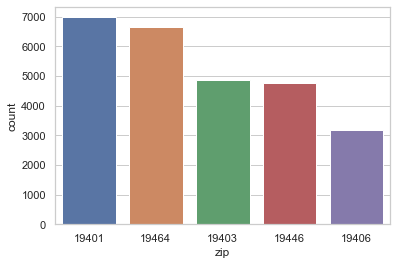

In [9]:
#Plot the top 5 zip codes

zip = df[df['zip' ] != 0 ]
sns.countplot(x = 'zip', data = zip, order = zip['zip'].value_counts().head(5).index)

In [10]:
#What are the top 5 townships(twp) for 911 calls?

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

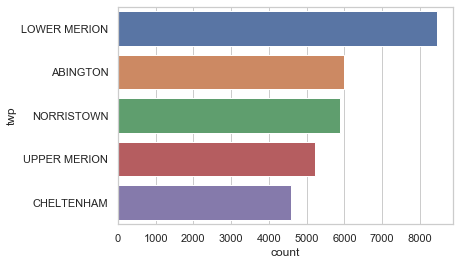

In [11]:
#Plot the top 5 townships(twp)
sns.countplot(y = 'twp', data = df, order = df['twp'].value_counts().head().index)

In [12]:
#Extract 911 calls reason from the title column 
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])

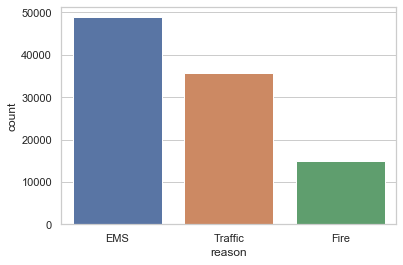

In [13]:
#Plot the top reasons for 911 calls 

sns.countplot(x = 'reason', data = df, order = df['reason'].value_counts().index)

In [25]:
#Extract Month from timeStamp column 

df['month'] =pd.DatetimeIndex(df['timeStamp']).month
df['mon'] =pd.DatetimeIndex(df['timeStamp']).month

In [15]:
#Map month number to the name 
dmap = {1 : 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['month'] = df['month'].map(dmap)

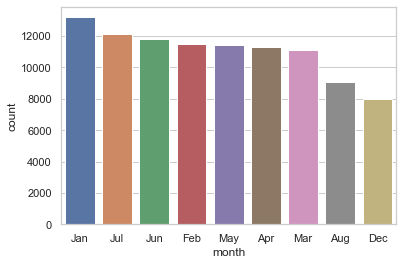

In [16]:
#Plot the number of 911 calls per month 

sns.countplot(x = 'month', data = df, order = df['month'].value_counts().index)

In [28]:
#Extract day of week from TimeStamp

df['dayofweek'] =pd.DatetimeIndex(df['timeStamp']).dayofweek
df['dayweek'] =pd.DatetimeIndex(df['timeStamp']).dayofweek
df['dayofweek'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: dayofweek, dtype: int64

In [18]:
#Map week number to week name 

wmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['dayofweek'] = df['dayofweek'].map(wmap)

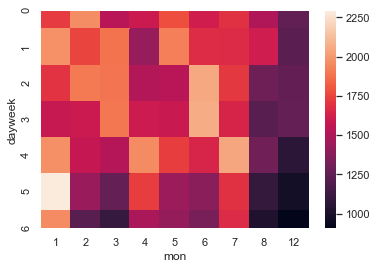

In [31]:
#Create heatmap of the count day & weeks of 911 calls 

k = df.groupby(by = ['dayweek', 'mon']).count()['reason'].unstack()
sns.heatmap(k)